# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [64]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
print(df.head())
print(df.count())
print(np.mean(df['temperature']))

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
temperature    130
gender         130
heart_rate     130
dtype: int64
98.24923076923078


# Is the distribution of body temperatures normal?

to determine if the distribution of body temperature is normal, I will graph the cdf of human body temperature and a sample of the normal distribution to see how well they match each other.

In [19]:
#IMPORTING NECESSARY MODULES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [21]:
def ecdf(data):
    #RETURNS X AND Y DATA FOR A ECDF
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    return x,y

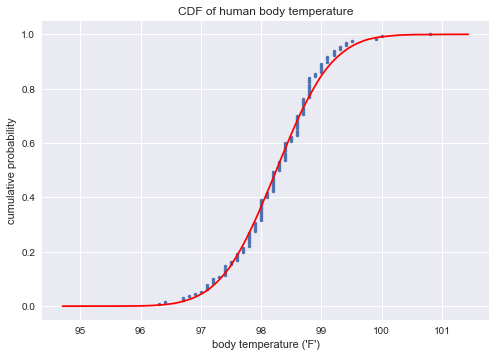

In [25]:
#SAMPLING FROM THE NORMAL DISTRIBUTION WITH MEAN AND STD FROM REAL DATA
mean=np.mean(df['temperature'])
std=np.std(df['temperature'])
normal_data=np.random.normal(mean,std,100000)
#print(len(normal_data))
#print(mean,std)

#OBTAINING ECDF OF REAL AND THEORETICAL DATA
x,y=ecdf(df['temperature'])
x_theor,y_theor=ecdf(normal_data)


#PLOTTING ECDF OF REAL AND THEORETICAL DATA
_=plt.plot(x,y,marker='.',linestyle='none')
_=plt.plot(x_theor,y_theor,color='red')
_=plt.title('CDF of human body temperature')
_=plt.xlabel("body temperature ('F')")
_=plt.ylabel('cumulative probability')
plt.show()


from the above graph it is clear that human body temperature is normally distributed

# Is the sample size large? Are the observations independent?

To determine if the sample size is large we use bootstrapping to figure out if we sampled human body temperature again and again what would we get for the mean.

In [35]:
def bootstrap_replicate_1d(data, func):
    #Generate bootstrap replicate of 1D data.
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 

def draw_bs_reps(data, func, size=1):
    #Draw bootstrap replicates

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

variance in mean: 0.00403028697855
95% confidence interval in mean:[ 98.12538462  98.37307692]


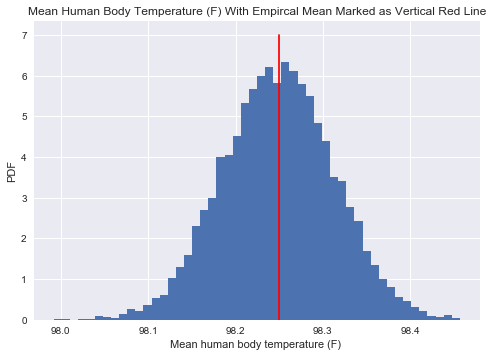

In [98]:
#TAKING 10000 BOOTSTRAP REPLICATES OF MEAN HUMAN BODY TEMPERATURE
bs_temperature=draw_bs_reps(df['temperature'],np.mean,10000)

#PRINT OUT VARIANCE TO SHOW DIFFERENCE
print("variance in mean: "+str(np.var(bs_temperature)))
print("95% confidence interval in mean:" +str(np.percentile(bs_temperature,[2.5,97.5])))

#PLOTTING OF MEAN HUMAN BODY TEMPERATURE
_ = plt.hist(bs_temperature,bins=50, normed=True)
_ = plt.plot([np.mean(df['temperature']),np.mean(df['temperature'])], [0, 7], 'k-',color='red')
_ = plt.plot(x=np.mean(df['temperature']),y=y,linestyle='-',color='red')
_ = plt.title('Mean Human Body Temperature (F) With Empircal Mean Marked as Vertical Red Line')
_ = plt.xlabel('Mean human body temperature (F) ')
_ = plt.ylabel('PDF')
plt.show()

The variance in the calculated mean shows us very clearly that if we were to repeat the measurement of human body temperature many times we would not have much change in the mean temperature. The graph also backups this observation.  This indicates that the sample size is suficiently large.

## Is the true population mean really 98.6 degrees F?

To determine this, I state the null hypothesis that the real mean human body temperature is actually 98.6.  I decide that my test statistic will mean.  I will then create a data set from df['temperature'] that has a mean of 98.6 by translating the data. then I will use bootstrapping to generate many observations of that dataset and test statistic to determine a p-value.

### 1. Would you use a one-sample or two-sample test? Why?
I would use a one-sample test because a two-sample test is used to compare two quanties while in this case we are not comparing anything
        
### 2. In this situation, is it appropriate to use the  tt  or  zz  statistic?
the Z statistic, because the size of the data is suffieciently large
    
### 3. Now try using the other test. How is the result be different? Why?



In [75]:
#TRANSLATE RECORDED TEMPERATURE TO HAVE MEAN OF 98.6
translated_body_temp=df['temperature']-(np.mean(df['temperature'])-98.6)
#print(np.mean(translated_body_temp))

#TAKING BS REPLICATES OF TRANSLATED DATA
bs_replicates=draw_bs_reps(translated_body_temp,np.mean,10000)

#CALCULATED P-VALUE
p=np.sum(bs_replicates<=np.mean(df['temperature']))/len(bs_replicates)

# Print the p-value
print('p = ', p)

p =  0.0


the observed p-value is < 0.0001 indicating that is very unlikely that the true population mean is actually 98.6, or stated another way that the difference in means was to chance. This conclusion could have also been drawn by the 95% confidence interval calculated above which is [ 98.12538462  98.37307692]. indicated that a mean of 98.6 would be very unlikely.  

this conclusion was reached with a one-sample test, we can perform a two-sample test by determine the p-value for difference of means between the translated_body_temp and the real df['temperature'] data.  we will do that now

In [97]:
def diff_of_means(data_1,data_2):
    #calculates the difference of means of two sets of data
    return np.mean(data_1)-np.mean(data_2)

# Compute difference of body temps: empirical_diff_means
empirical_diff_means = diff_of_means(np.array(df['temperature']),np.array(translated_body_temp))
#print(empirical_diff_means)

# Concatenate body temps: forces_concat
temps_concat = np.concatenate((np.array(df['temperature']),np.array(translated_body_temp)))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(temps_concat, size=len(temps_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(df['temperature'])],
                                     bs_sample[len(df['temperature']):])

# Compute and print p-value: p
p = sum(bs_replicates<=empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0001


the observed p-value is 0.0001 indicating again that is very unlikley that the true population mean is actually 98.6, or in this case that the two data sets are the same and that a a difference of 0.37 would occur by chance.  

# At what temperature should we consider someone's temperature to be "abnormal"?
I will start by computing the margin of error and confidence interval.  However, I do not know how to calculate margin of error so i will assume this means standard error of the mean

In [104]:
#TAKING 10000 BOOTSTRAP REPLICATES OF MEAN HUMAN BODY TEMPERATURE
bs_temperature=draw_bs_reps(df['temperature'],np.mean,10000)
sem=np.std(df['temperature'])/np.sqrt(len(df['temperature']))

#PRINT CONFIDENCE INTERVALS
print("variance in mean: "+str(np.var(bs_temperature)))
print("95% confidence interval in mean: " +str(np.percentile(bs_temperature,[2.5,97.5])))
print("99% confidence interval in mean: " +str(np.percentile(bs_temperature,[0.5,99.5])))
print("Standard error of the mean (SEM): "+str(sem))

variance in mean: 0.0041619383395
95% confidence interval in mean: [ 98.12230769  98.37461538]
99% confidence interval in mean: [ 98.08153462  98.41231538]
Standard error of the mean (SEM): 0.0640566146952


Now I would say that an abnormal temperature is anything from (98.12230769-0.0640566146952)=98.0582510753 to (98.37461538 + 0.0640566146952)= 98.4386719947.

# Is there a significant difference between males and females in normal temperature?

## What test did you use and why?

    I will use a permutation in this case because we have two sets of data, 1 for female, and one for male.  To do this I will assume that there is no signficant difference between males and females.  I will create 1 array of both data, then I will use np.random.permuation to scrabble the data, then reassign the order again then compute the test statistic, then calculate the p-value. the test statistic in this case will be the difference in the means. 


In [121]:
def permutation_sample(data_1, data_2):
    #PERMUTATING THE DATA
    permuted_data = np.random.permutation(np.concatenate((data_1, data_2)))
    return permuted_data[:len(data_1)], permuted_data[len(data_1):]

def draw_perm_reps(data_1, data_2, func, size=1):
    #Generate multiple permutation replicates.

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

#BREAKING DATA INTO MALE AND FEMALE
male_temp=df[df['gender']=='M']
female_temp=df[df['gender']=='F']
male_temp=np.array(male_temp['temperature'])
female_temp=np.array(female_temp['temperature'])

#CALCULATING EMPIRICAL DIFFERENCE
empirical_diff_means=diff_of_means(male_temp,female_temp)          

#CREATING LOTS OF PERMUTATIONS
perm_reps=draw_perm_reps(male_temp,female_temp,diff_of_means,10000)

#CALCULATING P VALUE
p=np.sum(perm_reps<=empirical_diff_means)/len(perm_reps)

# Print the result
print('p-value =', p)


p-value = 0.0123


With this small p value it indicates that there is a signficant difference between the average body temperatures of females vs males.

## Write a story with your conclusion in the context of the original problem.

This indicates that women and men both fit a normal distribution but however fit different normal distributions with different means. (I AM NOT REALLY SURE WHAT IS WANTED HERE...)


### BONUS QUESTION
#### is there a relation between body temperature and heart_rate?

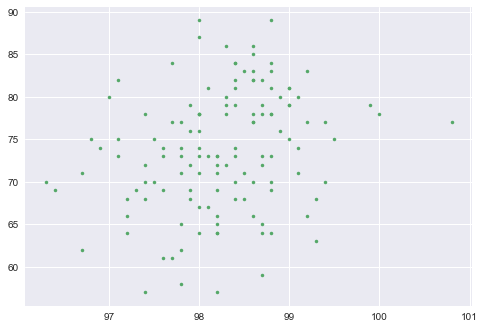

In [125]:
_ = plt.plot(df['temperature'],df['heart_rate'],marker='.',linestyle='none')
plt.show()

matrix=np.corrcoef(df['temperature'],df['heart_rate'],)
print(pearson )